# Jacobian Dynamics Visualization

이 노트북은 `jacobian_analysis.csv` 파일을 로드하여 Attraction Basin 전후의 Jacobian Norm 변화를 시각화합니다.
Box Plot 대신 변화 추이(Dynamics)를 더 잘 보여줄 수 있는 **Line Plot (Slope Graph)** 형식을 사용합니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data
csv_path = "results/cond_sharpness_dynamics_in_attraction_basin/jacobian_analysis.csv"
try:
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} rows.")
except FileNotFoundError:
    print("CSV file not found. Please check the path.")
    # Create Dummy Data for demonstration if file is missing (for robust code)
    data = {
        'Prompt': [f'P{i}' for i in range(20)],
        'Group': ['Memorized']*10 + ['Unmemorized']*10,
        'J_Prev': np.random.rand(20) * 10 + 20,
        'J_Post1': np.random.rand(20) * 5 + 5,
        'J_Post2': np.random.rand(20) * 2 + 2,
        'J_Prev_IE': np.random.rand(20) * 100 + 200,
        'J_Post1_IE': np.random.rand(20) * 50 + 50,
        'J_Post2_IE': np.random.rand(20) * 20 + 20,
    }
    df = pd.DataFrame(data)

df.head()

Loaded 200 rows.


,Prompt,Group,Drop_Index,J_Prev,J_Post1,J_Post2,J_Prev_IE,J_Post1_IE,J_Post2_IE,Diff_Curve
0,The No Limits Business Woman Podcast,Memorized,11,1157.573436,3.303689,3.924008,11379.799881,59.216084,68.453753,"[7.154702186584473, 7.897811412811279, 7.89735..."
1,Full body U-Zip main opening - Full body U-Zip...,Memorized,49,16.941810,17.547090,18.725363,135.201425,149.060124,142.423214,"[5.161706447601318, 5.594907283782959, 5.59569..."
2,Mothers influence on her young hippo,Memorized,17,35.159305,43.428705,7.763578,628.204174,2954.462345,252.760069,"[7.851851940155029, 8.72165584564209, 8.721213..."
3,"""Watch: Passion Pit's New Video, """"Lifted Up (...",Memorized,49,20.216555,21.572191,19.773196,77.736589,80.118022,97.053418,"[5.395537853240967, 5.505066871643066, 5.50234..."
4,Talks on the Precepts and Buddhist Ethics,Memorized,12,261.356147,20.006727,6.142731,3521.361171,145.504913,68.362410,"[6.1128621101379395, 6.68800687789917, 6.68780..."


In [3]:
# Data Preprocessing for plotting
# Melt the dataframe to have 'State' (Prev, Post1, Post2) as a column

# 1. Text Embedding (TE) Data
te_cols = ['J_Prev', 'J_Post1', 'J_Post2']
df_te = df.melt(id_vars=['Prompt', 'Group'], value_vars=te_cols, var_name='State', value_name='Jacobian_Norm')
df_te['State'] = df_te['State'].str.replace('J_', '') # Remove prefix
df_te['Metric_Type'] = 'Text Embedding'

# 2. Input Embedding (IE) Data
ie_cols = ['J_Prev_IE', 'J_Post1_IE', 'J_Post2_IE']
df_ie = df.melt(id_vars=['Prompt', 'Group'], value_vars=ie_cols, var_name='State', value_name='Jacobian_Norm')
df_ie['State'] = df_ie['State'].str.replace('J_', '').str.replace('_IE', '') # Remove suffix
df_ie['Metric_Type'] = 'Input Embedding'

# Combine (optional, but we will plot separately due to scale)
df_all = pd.concat([df_te, df_ie], ignore_index=True)

# Set Categorical Order for State
state_order = ['Prev', 'Post1', 'Post2']
df_te['State'] = pd.Categorical(df_te['State'], categories=state_order, ordered=True)
df_ie['State'] = pd.Categorical(df_ie['State'], categories=state_order, ordered=True)

In [4]:
def plot_jacobian_dynamics(data, title, ylabel):
    """
    Plots Jacobian dynamics using PointPlot (Mean + CI) and Spaghetti Plot (Individual Lines).
    """
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    
    # 1. Individual Lines (Spaghetti Plot) - Lightly colored
    # We iterate groups to color manually or use lineplot with units
    sns.lineplot(
        data=data, 
        x='State', 
        y='Jacobian_Norm', 
        hue='Group', 
        units='Prompt', 
        estimator=None, 
        alpha=0.15, 
        legend=None,
        palette={'Memorized': 'blue', 'Unmemorized': 'orange'}
    )
    
    # 2. Mean Trend (PointPlot) - Bold
    sns.pointplot(
        data=data, 
        x='State', 
        y='Jacobian_Norm', 
        hue='Group', 
        markers=['o', 's'], 
        capsize=.1, 
        errwidth=1.5,
        palette={'Memorized': 'darkblue', 'Unmemorized': 'darkorange'},
        dodge=0.05 # Slight offset to prevent overlap
    )
    
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel("Attraction Basin State", fontsize=14)
    plt.legend(title='Group', loc='upper right')
    plt.ylim(bottom=0) # Norm is always positive
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_774281/2333379398.py:23: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(


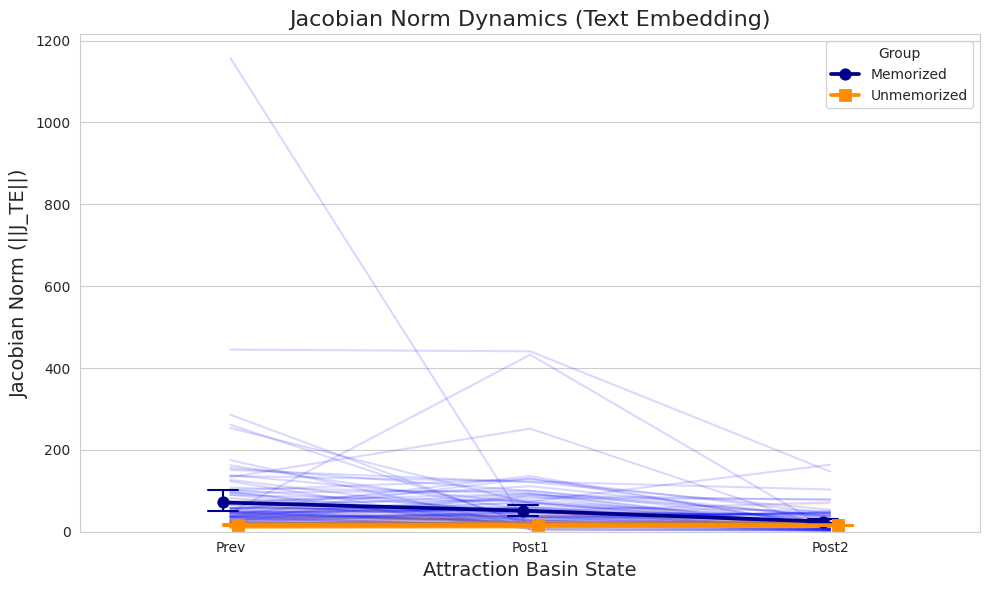

In [5]:
# Plot 1: Text Embedding Jacobian Dynamics
plot_jacobian_dynamics(df_te, "Jacobian Norm Dynamics (Text Embedding)", "Jacobian Norm (||J_TE||)")

/tmp/ipykernel_774281/2333379398.py:23: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(


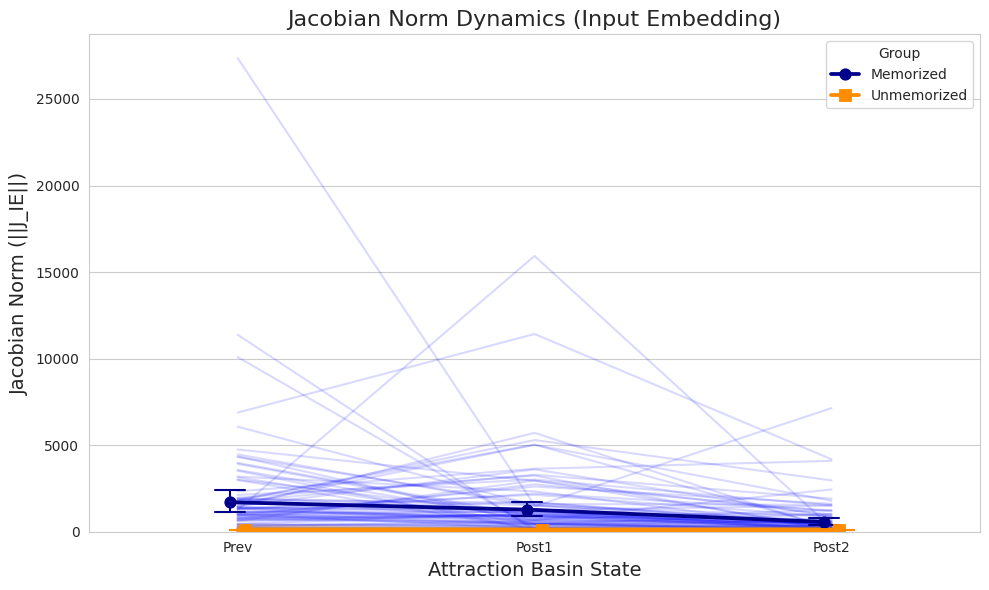

In [6]:
# Plot 2: Input Embedding Jacobian Dynamics
plot_jacobian_dynamics(df_ie, "Jacobian Norm Dynamics (Input Embedding)", "Jacobian Norm (||J_IE||)")

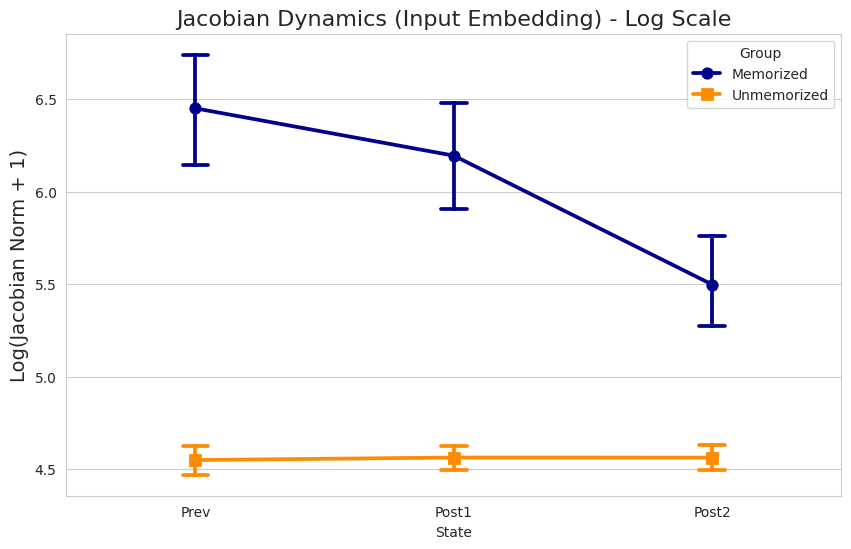

In [7]:
# Optional: Log Scale Plot for Input Embedding if range is huge
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
df_ie_log = df_ie.copy()
df_ie_log['Jacobian_Norm'] = np.log1p(df_ie_log['Jacobian_Norm'])

sns.pointplot(
    data=df_ie_log, 
    x='State', 
    y='Jacobian_Norm', 
    hue='Group', 
    markers=['o', 's'], 
    capsize=.1, 
    palette={'Memorized': 'darkblue', 'Unmemorized': 'darkorange'}
)
plt.title("Jacobian Dynamics (Input Embedding) - Log Scale", fontsize=16)
plt.ylabel("Log(Jacobian Norm + 1)", fontsize=14)
plt.show()